今天介绍一个AI生产力工具：LangSmith。本篇文章主要在Tracing部分的实操，包括环境准备、如何将你的LangChain程序和LangSimth平台打通，如何使用LangSimth调试Prompt，以及如何进行在线数据标注和收集，为后面的自动化评估作准备。

在开始之前，我们先来了解下为什么要有LangSmith：

维护一个生产级的 LLM 应用，我们需要做什么？

- 各种指标监控与统计：访问记录、响应时长、Token用量、计费等等

- 调试 Prompt，Prompt 版本管理（便于升级/回滚）

- 测试/验证系统的相关评估指标

- 数据集管理（便于回归测试）

LangSimth平台帮助你快速、可视化完成上面的流程。它允许您调试、测试、评估和监控构建在任何LLM框架上的链和智能代理，并与LangChain无缝集成。

# 1. 环境准备
LangSmith是LangChain 官方的 SaaS 服务，现已开源。

平台入口：https://www.langchain.com/langsmith

文档地址：https://python.langchain.com/docs/langsmith/walkthrough

注册登录之后，需要生成API key

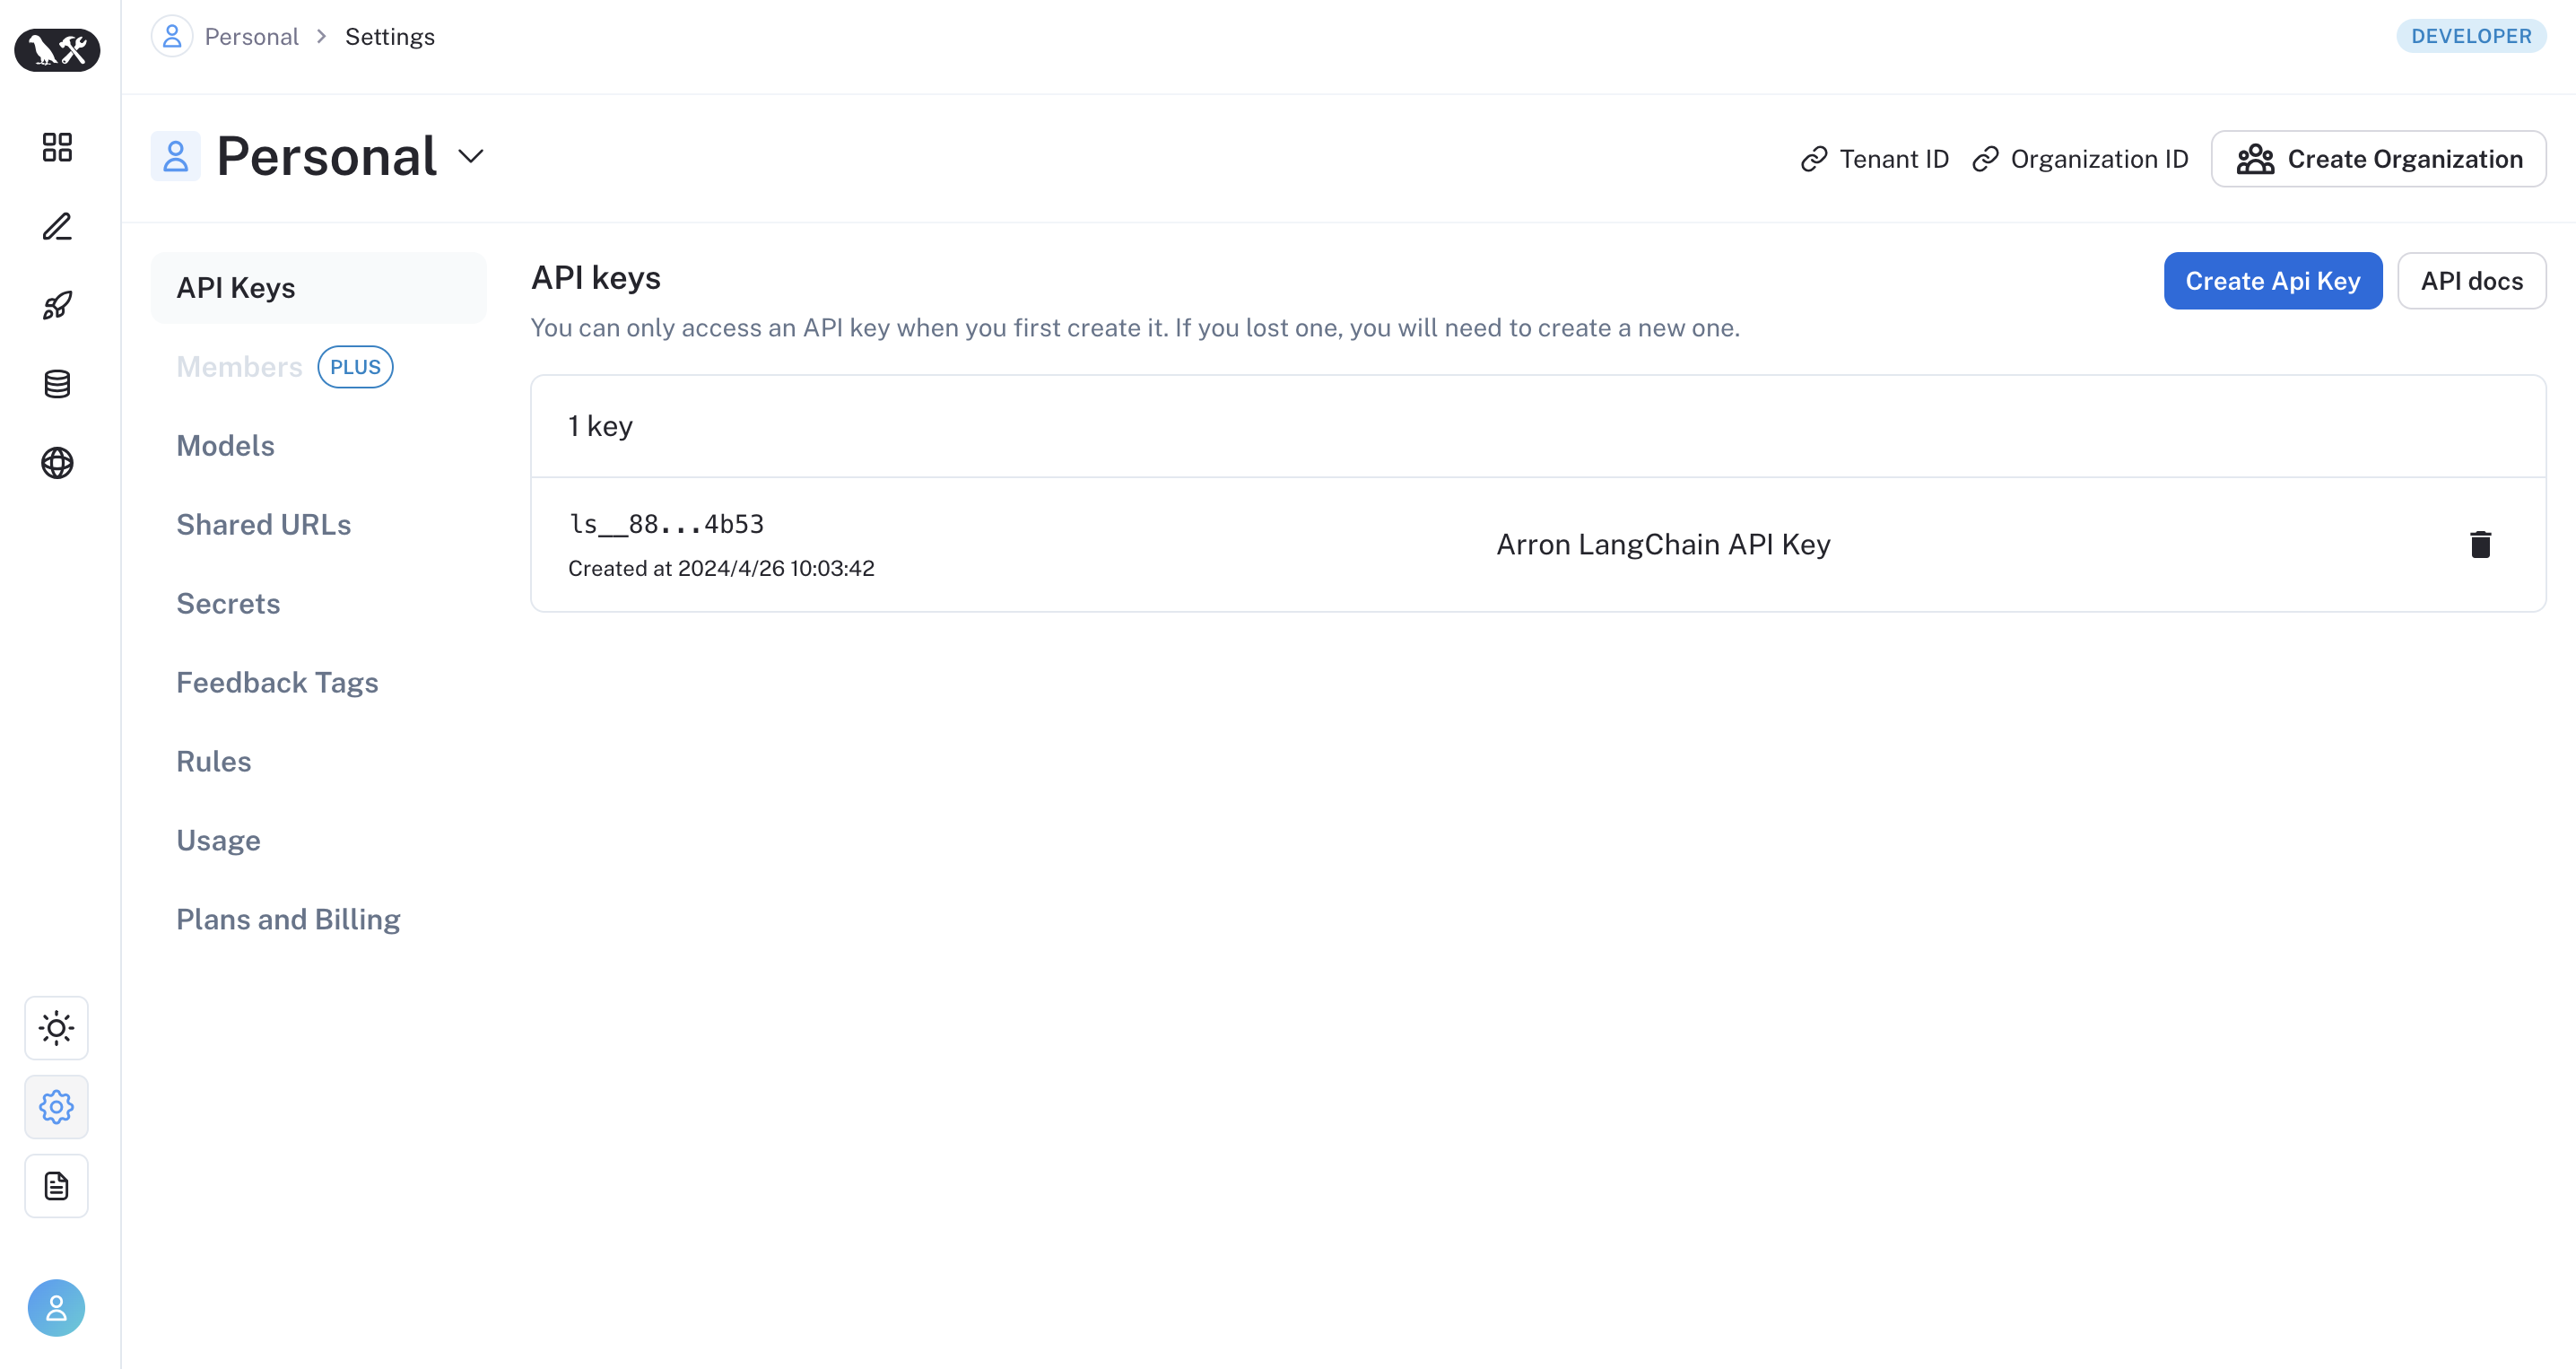

In [1]:
!pip install langchain langchain_openai

In [2]:
# 设置OpenAI KEY环境变量
import os
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

OpenAI API Key:··········


# 2. 打通LangChain和LangSmith
要打通 LangChain 和 LangSmith 很简单，只需要在环境变量中加入如下4个信息：

In [3]:
import os
LANGCHAIN_API_KEY = "ls__xxxxxx"  # LangChain API Key
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"  #LangSmith的服务端点

os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="test-001" #自定义项目名称

示例代码：

In [4]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema import HumanMessage
from langchain.prompts.chat import HumanMessagePromptTemplate
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI()

prompt_template = """
我的名字叫【{name}】，我的个人介绍是【{description}】。
请根据我的名字和介绍，帮我想一段有吸引力的自我介绍的句子，以此来吸引读者关注和点赞我的账号。
"""
prompt = ChatPromptTemplate.from_messages([
    HumanMessagePromptTemplate.from_template(prompt_template)
])

# 定义输出解析器
parser = StrOutputParser()

chain = (
    prompt
    | model
    | parser
)

## invoke的第一个参数，传入json格式的参数，key与prompt中的参数名一致
response = chain.invoke({'name': 'Arron', 'description': '热爱AI，持续学习，持续干货输出'})
print(response)

"大家好，我是Arron，一个对AI充满热爱并持续学习的人。在这里，我会不断分享最新的干货内容，让我们一起探索AI的无限可能！期待与你们一起交流学习！"


在LangSmith中查看项目test-001，结果如下图所示：



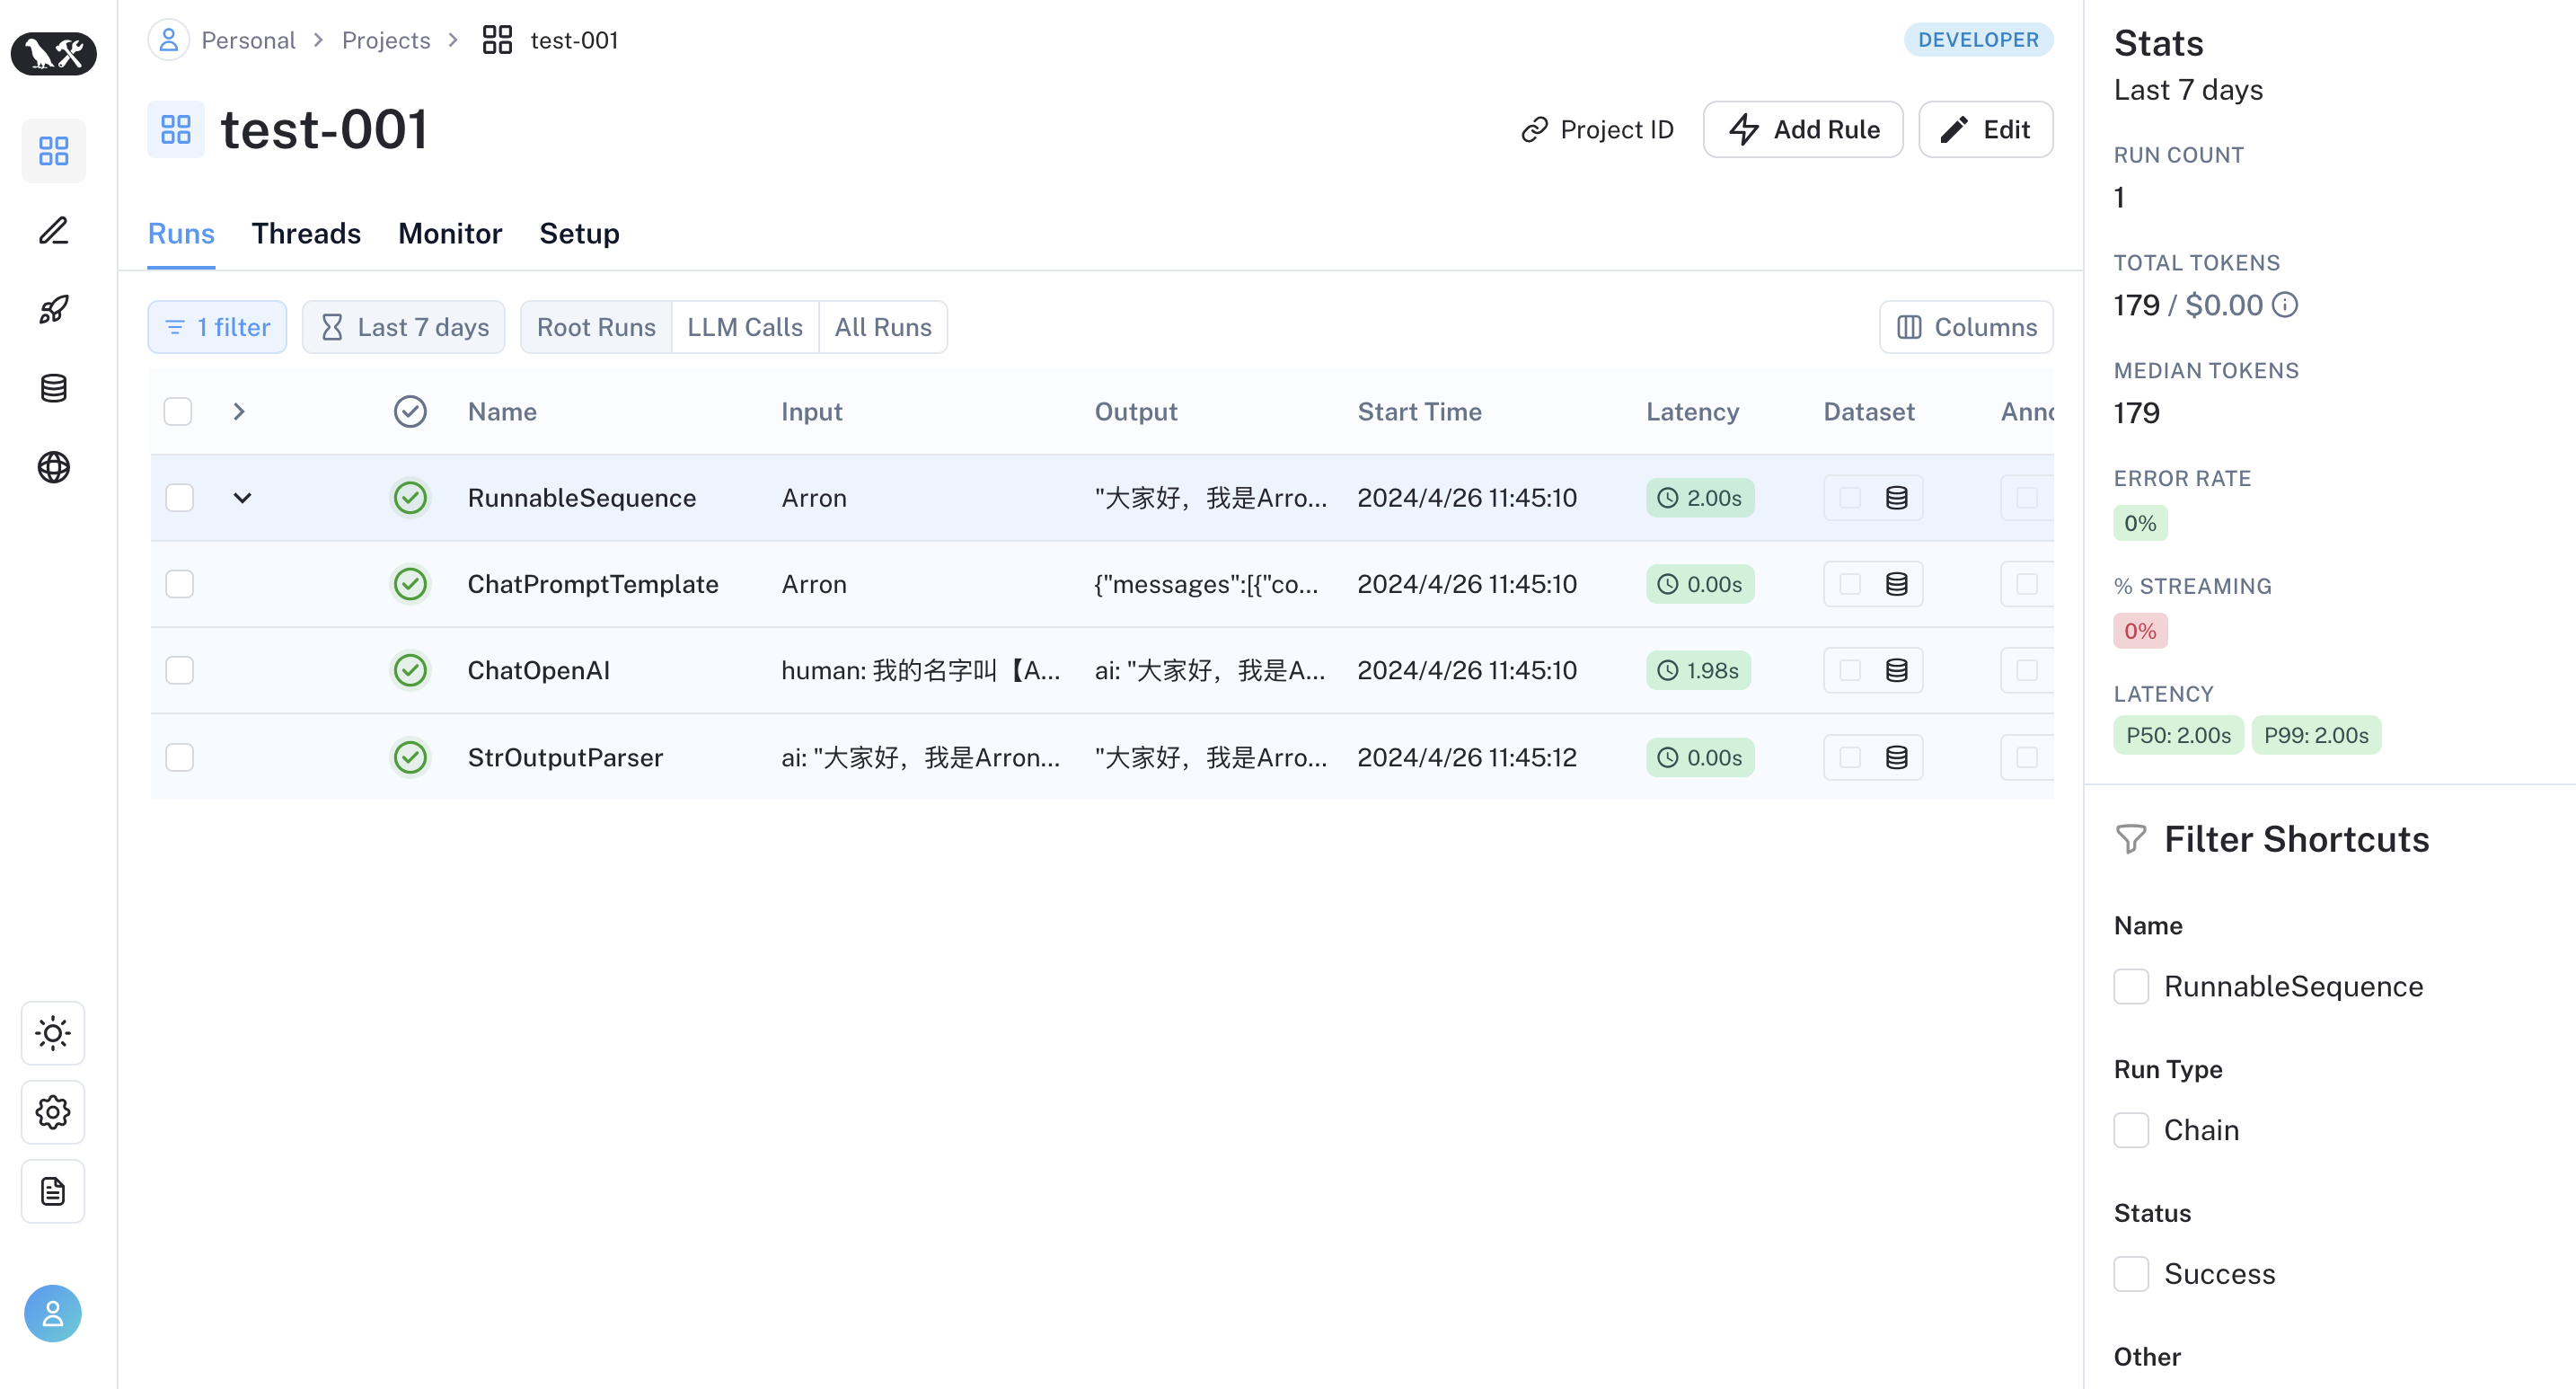
